<a href="https://colab.research.google.com/github/usshaa/Cheatsheets/blob/main/Activity7_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Student Placement Status Using Deep Learning (TensorFlow / Keras)



## 🎯 Objective:

Build a binary classification model using TensorFlow to predict whether a student will be placed based on academic and profile data.

### 🔶 Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

### 🔶 Step 2: Load and Prepare Data

In [4]:
# Load preprocessed dataset
df = pd.read_csv("Cleaned_College_Placement.csv")

# Drop unused columns
X = df.drop(['Sno', 'status', 'salary'], axis=1)
y = df['status']

# One-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)


### 🔶 Step 3: Train-Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### 🔶 Step 4: Scale Features

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 🔶 Step 5: Build the Deep Learning Model

In [7]:
model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

### 🔶 Step 6: Train the Model

In [8]:
history = model.fit(X_train_scaled, y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=16,
                    verbose=1)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.5841 - loss: 0.6672 - val_accuracy: 0.6571 - val_loss: 0.6304
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6349 - loss: 0.6557 - val_accuracy: 0.7429 - val_loss: 0.5783
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7491 - loss: 0.5756 - val_accuracy: 0.8000 - val_loss: 0.5371
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7761 - loss: 0.4961 - val_accuracy: 0.8000 - val_loss: 0.5055
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7929 - loss: 0.5127 - val_accuracy: 0.8000 - val_loss: 0.4811
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7635 - loss: 0.5012 - val_accuracy: 0.8286 - val_loss: 0.4605
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8336 - loss: 0.4428 - val_accuracy: 0.8286 - val_loss: 0.4433
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8330 - loss: 0.4417 - val_accuracy: 0.8286 - val_loss: 0.4287


### 🔶 Step 7: Evaluate the Model

In [9]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"✅ Test Accuracy: {accuracy:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.8498 - loss: 0.3597
✅ Test Accuracy: 0.8372


### 🔶 Step 8: Classification Report & Confusion Matrix

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.85      0.93      0.89        30

    accuracy                           0.84        43
   macro avg       0.82      0.77      0.79        43
weighted avg       0.83      0.84      0.83        43



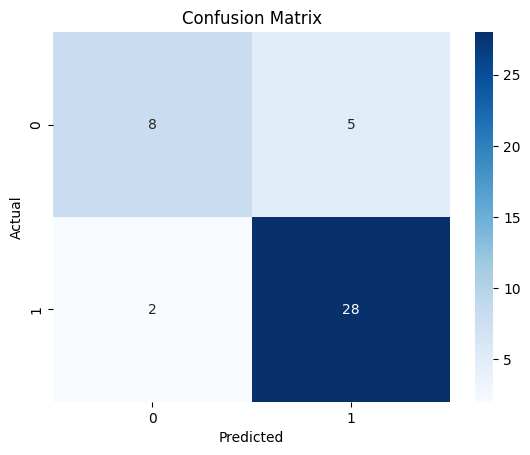

In [10]:
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype("int32")

print("Classification Report:")
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### 🔶 Step 9: Plot Training History


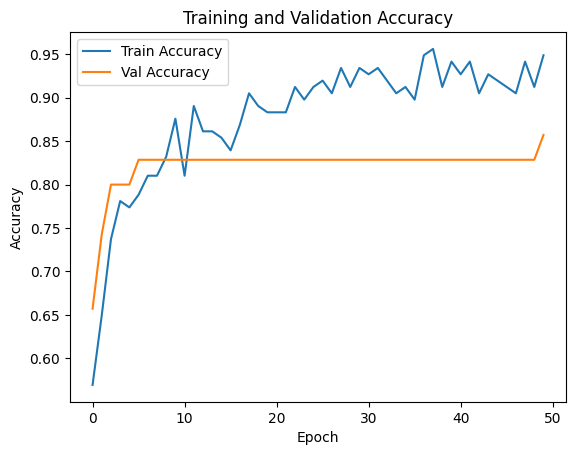

In [11]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()


### ✅ Bonus Ideas:

* Use **salary prediction** (regression task) with deep learning.
* Add **early stopping** and **model checkpoint** for optimization.
* Use **TensorBoard** for training visualization.
